## "Predictive Analytics and Insight Discovery in Bank Marketing Campaigns"


In this project, we aim to analyze a dataset from a bank marketing campaign to uncover insights and patterns related to customer behavior and response to the campaign. Our objective is to conduct a thorough Exploratory Data Analysis (EDA) to identify key factors influencing clients' decisions to subscribe to a term deposit. Following the EDA, we will focus on developing and evaluating predictive models using Logistic Regression and Random Forest and Gradient Boosting Classifier to forecast client subscription outcomes effectively. These algorithms are chosen for their popularity and effectiveness in binary classification problems, such as predicting whether a client will subscribe to a term deposit. This targeted approach will not only provide valuable insights into the effectiveness of the marketing strategies employed but also enable the accurate prediction of potential subscribers, thereby optimizing future marketing efforts.

Dataset References: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [20]:
bank = pd.read_csv("bank-full.csv", sep = ";", na_values = "unknown")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [21]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
bank.shape

(45211, 17)

The dataset contains 38172 records of clients without term deposit subscription and only 5021 records of clients with term deposit subscription. Clearly an imbalanced dataset.

In [23]:
bank.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## Encoding Dataset

In [24]:
# Mapping binary categorical variables to numeric values for easier processing
# Mapping "default": "no" to 0 and "yes" to 1
bank["default"] = bank["default"].map({"no": 0, "yes": 1})

# Mapping "housing" loan status: "no" to 0 and "yes" to 1
bank["housing"] = bank["housing"].map({"no": 0, "yes": 1})

# Mapping "personal" loan status: "no" to 0 and "yes" to 1
bank["loan"] = bank["loan"].map({"no": 0, "yes": 1})

# Mapping the target variable "y" (term deposit subscription): "no" to 0 and "yes" to 1
bank["y"] = bank["y"].map({"no": 0, "yes": 1})

# Mapping ordinal categorical variable "education" to numeric values
# This assigns an increasing value with the level of education
bank.education = bank.education.map({"primary": 0, "secondary": 1, "tertiary": 2})

# Converting the "month" column from string type to numeric type
# This involves first converting the month abbreviations to datetime format, then extracting the month as a numeric value
bank.month = pd.to_datetime(bank.month, format="%b").dt.month

In [25]:
bank.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [26]:
bank.dtypes

age            int64
job           object
marital       object
education    float64
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month          int32
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y              int64
dtype: object

In [27]:

# Dropping columns with a high percentage of missing values or those not needed for analysis
bank.drop(["poutcome", "contact"], axis=1, inplace=True)

# Handling missing values in 'job' by marking them as 'unknown'
# Convert 'job' to string type if it's not already, then fill missing values
bank['job'] = bank['job'].astype(str)  # Ensure 'job' is of string type
bank['job'].fillna('unknown', inplace=True)

# Handling missing values in 'education' by imputing with the mode
# First, find the mode of the 'education' column
education_mode = bank['education'].mode()[0]

# Impute missing 'education' values with the mode
bank['education'].fillna(education_mode, inplace=True)

# Converting remaining categorical variables into dummy variables
# This step is crucial for preparing the dataset for machine learning algorithms
# Using 'drop_first=True' to avoid multicollinearity by removing the first level of each categorical variable
bank = pd.get_dummies(bank, drop_first=True)

# At this point, the dataset 'bank' is preprocessed: missing values are handled, and categorical variables are converted
# The dataset is now ready for further analysis or modeling


In [28]:
bank.head(30)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_management,job_nan,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single
0,58,2.0,0,2143,1,0,5,5,261,1,...,True,False,False,False,False,False,False,False,True,False
1,44,1.0,0,29,1,0,5,5,151,1,...,False,False,False,False,False,False,True,False,False,True
2,33,1.0,0,2,1,1,5,5,76,1,...,False,False,False,False,False,False,False,False,True,False
3,47,1.0,0,1506,1,0,5,5,92,1,...,False,False,False,False,False,False,False,False,True,False
4,33,1.0,0,1,0,0,5,5,198,1,...,False,True,False,False,False,False,False,False,False,True
5,35,2.0,0,231,1,0,5,5,139,1,...,True,False,False,False,False,False,False,False,True,False
6,28,2.0,0,447,1,1,5,5,217,1,...,True,False,False,False,False,False,False,False,False,True
7,42,2.0,1,2,1,0,5,5,380,1,...,False,False,False,False,False,False,False,False,False,False
8,58,0.0,0,121,1,0,5,5,50,1,...,False,False,True,False,False,False,False,False,True,False
9,43,1.0,0,593,1,0,5,5,55,1,...,False,False,False,False,False,False,True,False,False,True


## "Key Preprocessing Steps for Dataset Readiness"

1. Numeric and Encoded Features: The dataset includes both numeric features and one-hot encoded categorical features, making it suitable for machine learning models which require numerical input.

2. Education Encoding: The education column is encoded numerically, with missing values imputed using the mode of the column. This ensures no missing values in a critical feature, maintaining data integrity for modeling.

3. Dummy Variables Creation: Categorical variables such as job and marital status have been converted into dummy variables. This transformation allows models to interpret these as distinct categories without any ordinal relationship, enhancing model accuracy.

4. Boolean Representation: The one-hot encoded columns are represented as boolean (True/False) values, indicating the presence or absence of a category. This efficient representation aids in simplifying the dataset structure for analysis.

5. Explicit Handling of 'Unknown' Categories: The dataset includes a specific column (job_nan) for marking originally missing job information as 'unknown'. This explicit tracking allows for nuanced analysis or modeling that accounts for records with missing job data.

6. Dataset Prepared for Analysis/Modeling: With preprocessing steps like missing value imputation, categorical variable encoding, and conversion to numeric formats completed, the dataset is well-prepared for detailed analysis or use in machine learning models, ensuring reliable and insightful outcomes.

<Axes: title={'center': 'Count (target)'}, xlabel='y'>

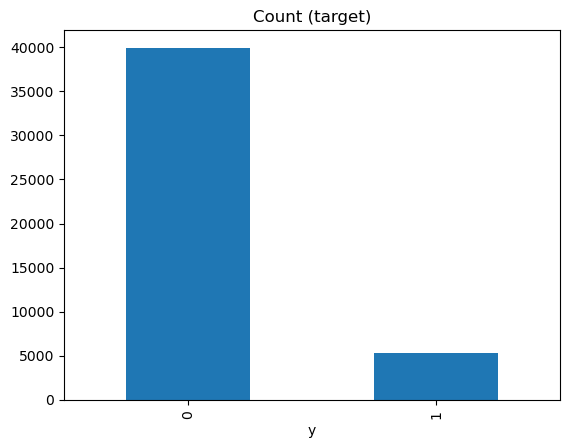

In [29]:
bank.y.value_counts().plot(kind='bar', title='Count (target)')

In [30]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## SMOTE


We utilized SMOTE (Synthetic Minority Over-sampling Technique) in our analysis due to its effectiveness in addressing the challenge of class imbalance within our dataset. Class imbalance can significantly bias the model towards the majority class, reducing its ability to accurately predict minority class instances, which are often of greater interest. SMOTE helps by generating synthetic examples of the minority class, thereby balancing the class distribution without losing valuable information. This technique improves the model's ability to learn from both classes equally, enhancing overall prediction accuracy and reliability, especially for the minority class. By applying SMOTE, we aimed to create a more balanced training environment for our model, enabling it to perform better on underrepresented data and thus ensure more generalized and equitable predictive performance.

In [34]:
from imblearn.over_sampling import SMOTE
# Assuming 'bank' is your preprocessed DataFrame and 'y' is the target variable column
X = bank.drop('y', axis=1)  # Features
y = bank['y']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing SMOTE object
smote = SMOTE(random_state=42)

# Applying SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# You can now proceed with training your model on the balanced dataset
# X_train_smote and y_train_smote contain the oversampled data


In [37]:
np.bincount(y_train_smote)

array([31937, 31937])

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model with class weights set to 'balanced'
# This option uses the values of y to automatically adjust weights inversely proportional to class frequencies
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model using the oversampled training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.53      0.55      0.54      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.74      0.74      9043
weighted avg       0.89      0.89      0.89      9043

Confusion Matrix:
 [[7470  515]
 [ 474  584]]


In [85]:
# Initialize the Random Forest model with class weights set to 'balanced'
# This option uses the values of y to automatically adjust weights inversely proportional to class frequencies
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# this time on X_train, y_train and NOT the smote ones to compare the results
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7985
           1       0.64      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
 [[7798  187]
 [ 722  336]]


## Insights
Impact of SMOTE: Applying SMOTE has made the RandomForestClassifier more adept at recognizing the minority class (subscriptions), as evidenced by the increased recall. This is beneficial in scenarios where capturing as many positive instances as possible is more important than avoiding false positives, such as in marketing campaigns where the cost of a false positive (sending a promotional material to a non-interested customer) is low compared to the missed opportunity of not identifying a potential subscriber.
Trade-offs: The increase in recall for class 1 comes with a decrease in precision, which is a common trade-off in predictive modeling, especially on imbalanced datasets. The slight drop in overall accuracy is also part of this trade-off.
Business Decision: The choice between these two models depends on the business objective. If the goal is to maximize the identification of potential subscribers (even at the cost of increasing marketing expenses due to false positives), the model trained on SMOTE data is preferable. However, if maintaining a higher precision to minimize costs is crucial, the model trained on the original dataset might be more appropriate.
## Conclusion
The comparison underscores the importance of aligning model selection and tuning with business objectives. Balancing techniques like SMOTE, combined with class weight adjustments, can significantly enhance a model's sensitivity to minority classes, a desirable attribute in many practical applications. However, it's essential to carefully consider the implications of increased false positives and overall model accuracy in the context of specific business costs and benefits.

## "Addressing Class Imbalance with Random Over-Sampling"

randomly duplicating instances of the minority class until both classes have the same number of instances.

In [58]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler object
over_sampler = RandomOverSampler(random_state=42)

# Correctly use the fit_resample method to oversample the training data
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)


In [86]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6309 1676]
 [ 298  760]]
0.7817096096428177
0.718336483931947
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7985
           1       0.31      0.72      0.44      1058

    accuracy                           0.78      9043
   macro avg       0.63      0.75      0.65      9043
weighted avg       0.88      0.78      0.81      9043



/Users/venus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
randomover = pd.DataFrame({'Balancing Method': 'Random Oversampling',
                      'Accuracy':accuracy_score(y_test, y_pred),
                      "Recall": recall_score(y_test, y_pred)},index=["Reglog"])
randomover

,Balancing Method,Accuracy,Recall
Reglog,Random Oversampling,0.78171,0.718336


##  "Addressing Class Imbalance with Random Under-Sampling"

randomly reducing the number of instances in the majority class until the classes have an equal number of instances.

In [61]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler object
under_sampler = RandomUnderSampler(random_state=42)

# Use the fit_resample method to undersample the training data
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)


In [62]:
y_train_under.value_counts()

y
0    4231
1    4231
Name: count, dtype: int64

In [87]:
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6228 1757]
 [ 275  783]]
0.7752958089129713
0.7400756143667296
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      7985
           1       0.31      0.74      0.44      1058

    accuracy                           0.78      9043
   macro avg       0.63      0.76      0.65      9043
weighted avg       0.88      0.78      0.81      9043



/Users/venus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
Randomunder = pd.DataFrame({'Balancing Method': 'Random Undersampling',
                      'Accuracy':accuracy_score(y_test, y_pred),
                      "Recall": recall_score(y_test, y_pred)},index=["Reglog"])
Randomunder

,Balancing Method,Accuracy,Recall
Reglog,Random Undersampling,0.775296,0.740076


In [65]:
frames = [smote,randomover, Randomunder]
TrainingResult = pd.concat(frames)
TrainingResult

,Balancing Method,Accuracy,Recall
Reglog,SMOTE,0.857569,0.520794
Reglog,Random Oversampling,0.781710,0.718336
Reglog,Random Undersampling,0.775296,0.740076


## "Combining SMOTE and Tomek Links for Class Imbalance Correction"

This method employs SMOTETomek from the imbalanced-learn library, which integrates the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling the minority class with Tomek Links for cleaning overlapping samples between classes. This dual approach not only addresses the imbalance by augmenting the minority class but also enhances the quality of the dataset by removing instances that may contribute to classification noise.

In [67]:
from imblearn.combine import SMOTETomek

# Initialize the SMOTETomek object
smotemek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Use the fit_resample method to apply SMOTE followed by Tomek Links cleaning
X_train_smt, y_train_smt = smotemek.fit_resample(X_train, y_train)


In [68]:
y_train_smt.value_counts()

y
0    31136
1    31136
Name: count, dtype: int64

In [70]:
lr = LogisticRegression()
lr.fit(X_train_smt, y_train_smt)

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[6439 1546]
 [ 308  750]]
0.7949795421873272
0.7088846880907372


/Users/venus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## "Training a Gradient Boosting Classifier on a Balanced Dataset".

This method involves using a Gradient Boosting Classifier (GBC) from sklearn's ensemble module, configured with specific hyperparameters such as the number of estimators, learning rate, and maximum depth of the trees. The model is trained on a dataset balanced through a combination of SMOTE and Tomek Links (as indicated by the variables X_train_smt and y_train_smt), which addresses class imbalance by oversampling the minority class and cleaning the overlapping samples between classes. Once trained, the model is used to make predictions on the test set. This approach leverages the powerful Gradient Boosting algorithm to learn from a more representative, balanced dataset, aiming to improve the model's predictive performance and generalizability, especially in scenarios where class imbalance might otherwise bias the model towards the majority class.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model using the balanced dataset
gbc.fit(X_train_smt, y_train_smt)

# Predict on the test set
predictions = gbc.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7985
           1       0.48      0.63      0.54      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.77      0.74      9043
weighted avg       0.89      0.88      0.88      9043

Confusion Matrix:
 [[7266  719]
 [ 393  665]]


In [90]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model using the balanced dataset
rf_classifier.fit(X_train_smt, y_train_smt)

# Predict on the test set and evaluate
predictions_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7985
           1       0.52      0.56      0.54      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.75      0.74      9043
weighted avg       0.89      0.89      0.89      9043

Confusion Matrix:
 [[7266  719]
 [ 393  665]]


## Business Implications

The insights of these models enable us to target our marketing more precisely, ensuring we focus our efforts and resources on the customers most likely to subscribe to our term deposits. By better identifying potential subscribers (and equally important, those unlikely to subscribe), we can optimize our marketing spend, improve customer engagement strategies, and ultimately enhance our subscription rates. This model not only aids in direct marketing efficiency but also provides strategic insights that can influence product development and customer service enhancements.